In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Public\\Social_Network_Ads.csv")

In [3]:
df.head()

,User id,gender,Age,EstimatedSalary,Purchased
0,12324468,male,19,19000,0
1,12324469,female,35,20000,0
2,12324470,male,26,43000,0
3,12324471,female,27,57000,0
4,12324472,male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User id          400 non-null    int64 
 1   gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User id,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.232467e+07,37.655000,69742.500000,0.357500
std,1.156143e+02,10.482877,34096.960282,0.479864
min,1.232447e+07,18.000000,15000.000000,0.000000
25%,1.232457e+07,29.750000,43000.000000,0.000000
50%,1.232467e+07,37.000000,70000.000000,0.000000
75%,1.232477e+07,46.000000,88000.000000,1.000000
max,1.232487e+07,60.000000,150000.000000,1.000000


In [6]:
df.drop("User id",axis = 1,inplace = True)

In [7]:
df.head()

,gender,Age,EstimatedSalary,Purchased
0,male,19,19000,0
1,female,35,20000,0
2,male,26,43000,0
3,female,27,57000,0
4,male,19,76000,0


In [8]:
df = pd.get_dummies(df,drop_first = True)

In [9]:
df.head()

,Age,EstimatedSalary,Purchased,gender_male
0,19,19000,0,1
1,35,20000,0,0
2,26,43000,0,1
3,27,57000,0,0
4,19,76000,0,1


In [10]:
x = df.loc[:,['Age','EstimatedSalary','gender_male']].values
y = df.loc[:,['Purchased']].values

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [12]:
X

array([[-1.78179743, -1.49004624,  1.        ],
       [-0.25358736, -1.46068138, -1.        ],
       [-1.11320552, -0.78528968,  1.        ],
       ...,
       [ 1.17910958, -1.46068138, -1.        ],
       [-0.15807423, -1.07893824,  1.        ],
       [ 1.08359645, -0.99084367, -1.        ]])

In [13]:
y.shape

(400, 1)

In [14]:
Y = y.reshape(-1)

In [15]:
Y.shape

(400,)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25, random_state = 0)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [18]:
acc_list = []
err_list = []

for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_list.append(acc)
    err_list.append(1-acc)
    


In [19]:
acc_list

[0.86,
 0.88,
 0.92,
 0.9,
 0.92,
 0.92,
 0.92,
 0.92,
 0.92,
 0.92,
 0.93,
 0.92,
 0.93,
 0.9,
 0.91,
 0.9,
 0.92,
 0.9,
 0.9,
 0.89,
 0.89,
 0.89,
 0.91,
 0.9]

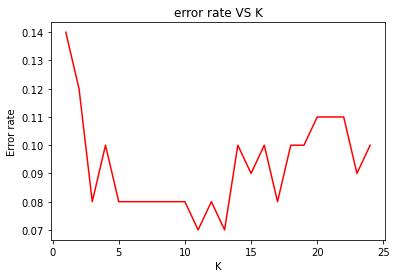

In [20]:
plt.plot(list(range(1,25)),err_list,c="r")
plt.title("error rate VS K")
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [21]:
model = KNeighborsClassifier(n_neighbors=5)

In [22]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
y_pred = model.predict(x_test)

In [24]:
confusion_matrix(y_test,y_pred)

array([[64,  4],
       [ 4, 28]], dtype=int64)

In [25]:
accuracy_score(y_test,y_pred)

0.92

In [26]:
import pickle

In [28]:
filename = 'sc.pkl'
pickle.dump(model,open(filename,'wb'))

In [29]:
file = 'model_Social_ads.pkl'
pickle.dump(model,open(file,'wb'))